<a href="https://colab.research.google.com/github/mchelghoum-eng/Regression-Howmework/blob/main/Regression_HomeWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving homework.csv to homework (4).csv
Dataset loaded successfully!
Shape of dataset: (546, 13)

First few rows:
   rownames  price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0         1  42000     5850         3        1        2      yes      no   
1         2  38500     4000         2        1        1      yes      no   
2         3  49500     3060         3        1        1      yes      no   
3         4  60500     6650         3        1        2      yes     yes   
4         5  61000     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 


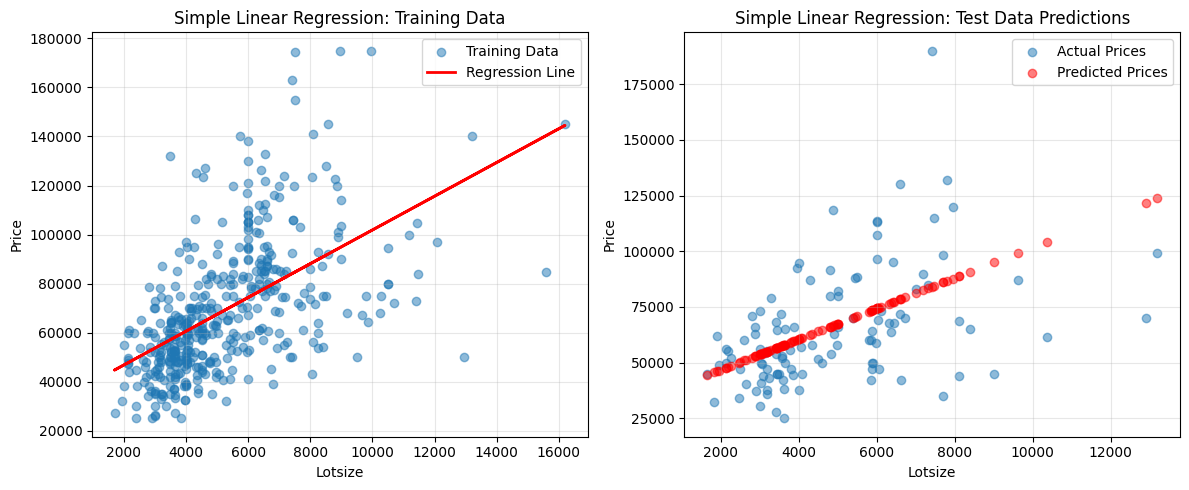


PART 2: MULTIPLE LINEAR REGRESSION
Number of features: 11
Features used: ['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']

Training set size: 436 samples
Testing set size: 110 samples

Multiple Linear Regression Results:
Intercept: -2513.00

Feature Coefficients:
  lotsize: 3.6540
  bedrooms: 955.8650
  bathrms: 13582.2404
  stories: 7204.6491
  driveway: 6940.0124
  recroom: 4556.7444
  fullbase: 6377.0233
  gashw: 15128.9605
  airco: 12674.6163
  garagepl: 4611.6480
  prefarea: 7815.1939

Mean Squared Error: 256524986.52
R-squared Score: 0.6160

MODEL COMPARISON
Metric                    Simple Regression    Multiple Regression 
-----------------------------------------------------------------
R-squared Score           0.1858               0.6160              
Mean Squared Error        543921224.56         256524986.52        


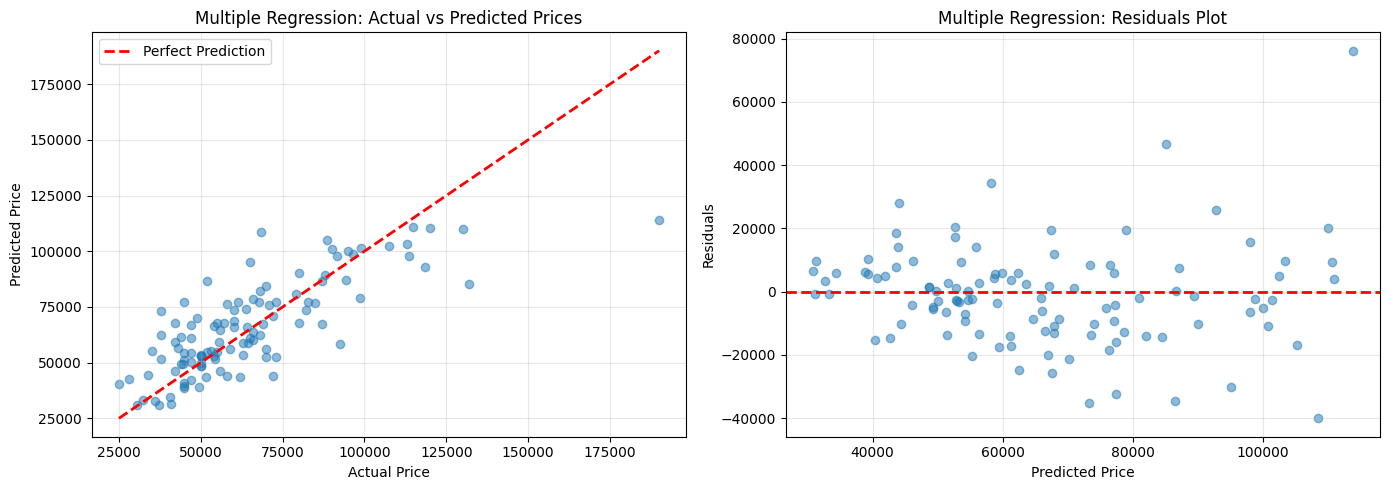


PREDICTION EXAMPLES

Simple Regression Example:
For a lotsize of 5000, predicted price: $67,430.41

Multiple Regression Example:
For a house with the following features:
  Lotsize: 5000, Bedrooms: 3, Bathrooms: 2, Stories: 2
  Driveway: Yes, Recroom: No, Fullbase: Yes
  Gashw: No, Airco: Yes, Garagepl: 2, Prefarea: No

Predicted price: $95,413.27

FEATURE IMPORTANCE ANALYSIS

Features ranked by importance (absolute coefficient value):
 Feature  Coefficient
   gashw 15128.960472
 bathrms 13582.240421
   airco 12674.616347
prefarea  7815.193892
 stories  7204.649076
driveway  6940.012357
fullbase  6377.023266
garagepl  4611.647954
 recroom  4556.744351
bedrooms   955.865044
 lotsize     3.653990


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


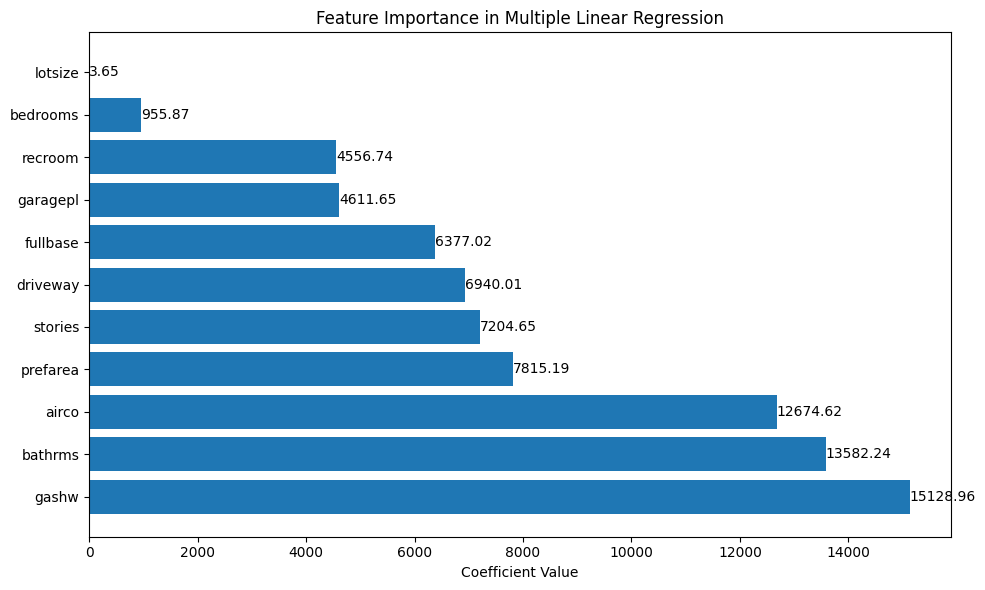


CONCLUSION
1. Simple Linear Regression:
   - Using only lotsize as predictor
   - R² Score: 0.1858
   - MSE: 543921224.56
   - Coefficient: For each unit increase in lotsize, price increases by 6.8854

2. Multiple Linear Regression:
   - Using all available features
   - R² Score: 0.6160 (Higher is better)
   - MSE: 256524986.52 (Lower is better)
   - Most important features: ['gashw', 'bathrms', 'airco']

The Multiple Linear Regression model performs better than the Simple Linear Regression model.


In [27]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the data
# Assuming the CSV file is uploaded to Colab as 'homework.csv'
# If using local file upload in Colab:
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('homework.csv')
print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print("\nFirst few rows:")
print(df.head())

# Step 3: Explore the data
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 4: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 5: Preprocess categorical variables (for multiple regression)
# We'll encode categorical variables to numeric values
categorical_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

# Create a copy for multiple regression
df_multiple = df.copy()

# Encode categorical variables (yes/no to 1/0)
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_multiple[col] = label_encoder.fit_transform(df_multiple[col])

print("\nCategorical variables encoded successfully!")
print("\nFirst few rows after encoding:")
print(df_multiple[categorical_cols].head())

# ============================
# PART 1: SIMPLE LINEAR REGRESSION
# Using lotsize as X and price as Y
# ============================
print("\n" + "="*50)
print("PART 1: SIMPLE LINEAR REGRESSION")
print("="*50)

# Prepare data for simple linear regression
X_simple = df[['lotsize']]  # Independent variable
y_simple = df['price']      # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_simple.shape[0]} samples")
print(f"Testing set size: {X_test_simple.shape[0]} samples")

# Create and train the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the model
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("\nSimple Linear Regression Results:")
print(f"Intercept: {simple_model.intercept_:.2f}")
print(f"Coefficient (lotsize): {simple_model.coef_[0]:.4f}")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"R-squared Score: {r2_simple:.4f}")

# Interpretation
print(f"\nInterpretation:")
print(f"For every 1 unit increase in lotsize, price increases by {simple_model.coef_[0]:.4f} units")

# Visualize the simple linear regression
plt.figure(figsize=(12, 5))

# Plot 1: Training data with regression line
plt.subplot(1, 2, 1)
plt.scatter(X_train_simple, y_train_simple, alpha=0.5, label='Training Data')
plt.plot(X_train_simple, simple_model.predict(X_train_simple), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Test data with predictions
plt.subplot(1, 2, 2)
plt.scatter(X_test_simple, y_test_simple, alpha=0.5, label='Actual Prices')
plt.scatter(X_test_simple, y_pred_simple, alpha=0.5, color='red', label='Predicted Prices')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Test Data Predictions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================
# PART 2: MULTIPLE LINEAR REGRESSION
# Using all available features (excluding rownames)
# ============================
print("\n" + "="*50)
print("PART 2: MULTIPLE LINEAR REGRESSION")
print("="*50)

# Prepare data for multiple linear regression
# We'll use all columns except 'rownames' and 'price' as features
# 'price' will be our target variable
X_multiple = df_multiple.drop(['rownames', 'price'], axis=1)
y_multiple = df_multiple['price']

print(f"Number of features: {X_multiple.shape[1]}")
print("Features used:", list(X_multiple.columns))

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train_multi.shape[0]} samples")
print(f"Testing set size: {X_test_multi.shape[0]} samples")

# Create and train the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\nMultiple Linear Regression Results:")
print(f"Intercept: {multi_model.intercept_:.2f}")
print("\nFeature Coefficients:")
for feature, coef in zip(X_multiple.columns, multi_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"\nMean Squared Error: {mse_multi:.2f}")
print(f"R-squared Score: {r2_multi:.4f}")

# Compare both models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"{'Metric':<25} {'Simple Regression':<20} {'Multiple Regression':<20}")
print(f"{'-'*65}")
print(f"{'R-squared Score':<25} {r2_simple:<20.4f} {r2_multi:<20.4f}")
print(f"{'Mean Squared Error':<25} {mse_simple:<20.2f} {mse_multi:<20.2f}")

# Visualize multiple regression results
plt.figure(figsize=(14, 5))

# Plot 1: Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_multi, y_pred_multi, alpha=0.5)
plt.plot([y_test_multi.min(), y_test_multi.max()],
         [y_test_multi.min(), y_test_multi.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Regression: Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot
plt.subplot(1, 2, 2)
residuals = y_test_multi - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Multiple Regression: Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 6: Make predictions with new data (example)
print("\n" + "="*50)
print("PREDICTION EXAMPLES")
print("="*50)

# Example 1: Using simple regression
print("\nSimple Regression Example:")
example_lotsize = 5000
predicted_price_simple = simple_model.predict([[example_lotsize]])[0]
print(f"For a lotsize of {example_lotsize}, predicted price: ${predicted_price_simple:,.2f}")

# Example 2: Using multiple regression
print("\nMultiple Regression Example:")
# Create an example house with all features
example_house = pd.DataFrame({
    'lotsize': [5000],
    'bedrooms': [3],
    'bathrms': [2],
    'stories': [2],
    'driveway': [1],  # yes
    'recroom': [0],   # no
    'fullbase': [1],  # yes
    'gashw': [0],     # no
    'airco': [1],     # yes
    'garagepl': [2],
    'prefarea': [0]   # no
})

# Make sure the columns are in the same order as the training data
example_house = example_house[X_multiple.columns]

predicted_price_multi = multi_model.predict(example_house)[0]
print(f"For a house with the following features:")
print(f"  Lotsize: 5000, Bedrooms: 3, Bathrooms: 2, Stories: 2")
print(f"  Driveway: Yes, Recroom: No, Fullbase: Yes")
print(f"  Gashw: No, Airco: Yes, Garagepl: 2, Prefarea: No")
print(f"\nPredicted price: ${predicted_price_multi:,.2f}")

# Step 7: Feature importance analysis
print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)

# Create a DataFrame with feature names and their coefficients
feature_importance = pd.DataFrame({
    'Feature': X_multiple.columns,
    'Coefficient': multi_model.coef_,
    'Absolute_Coefficient': np.abs(multi_model.coef_)
})

# Sort by absolute coefficient value
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

print("\nFeatures ranked by importance (absolute coefficient value):")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Multiple Linear Regression')
plt.axvline(x=0, color='black', linewidth=0.5)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             ha='left' if width >= 0 else 'right',
             va='center')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("CONCLUSION")
print("="*50)
print("1. Simple Linear Regression:")
print(f"   - Using only lotsize as predictor")
print(f"   - R² Score: {r2_simple:.4f}")
print(f"   - MSE: {mse_simple:.2f}")
print(f"   - Coefficient: For each unit increase in lotsize, price increases by {simple_model.coef_[0]:.4f}")

print("\n2. Multiple Linear Regression:")
print(f"   - Using all available features")
print(f"   - R² Score: {r2_multi:.4f} (Higher is better)")
print(f"   - MSE: {mse_multi:.2f} (Lower is better)")
print(f"   - Most important features: {feature_importance['Feature'].iloc[:3].tolist()}")

if r2_multi > r2_simple:
    print("\nThe Multiple Linear Regression model performs better than the Simple Linear Regression model.")
else:
    print("\nThe Simple Linear Regression model performs better than the Multiple Linear Regression model.")